<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/Linear_Regression_with_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Getting Data and Preprocessing

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-24 01:14:14--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-24 01:14:14 (33.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
df = pd.read_csv('moore.csv', header = None).values

In [9]:
X = df[:,0] # All the data in the first column, used https://stackoverflow.com/questions/63545378/what-does-data-0-or-data-1-mean-in-pandas to figure out what data[:,0] meant
y = df[:,1] # All the data in the second column
X.shape, y.shape

((162,), (162,))

In [10]:
# We need to reshape X to become a N x D matrix where D = 1 becuaze keras expects a ((162,1)) input
X = X.reshape(-1,1)
X.shape

(162, 1)

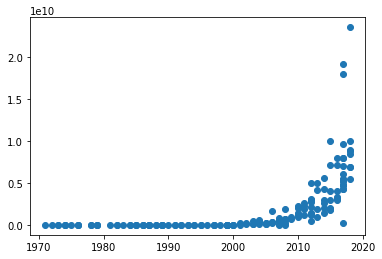

In [12]:
plt.scatter(X, y) # It is exponential so we need to find the log of the Y values to make it linear

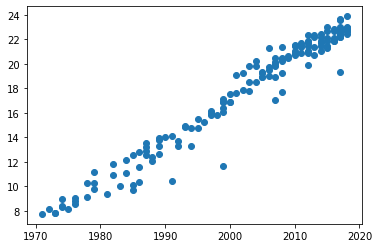

In [13]:
y = np.log(y) # Not 100% sure how this works
plt.scatter(X, y)

In [14]:
# X needs to be centered around zero, so we should find the mean of X and subtract it from the X values
X = X - X.mean()

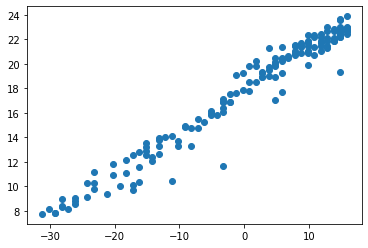

In [15]:
plt.scatter(X,y) # X is now centered around zero

## Model

In [30]:
model = Sequential()

model.add(Dense(10, activation = 'relu', input_shape = (1,))) # Confused here a little bit
model.add(Dense(1)) # Had to look at notebook to see that there is no activation function here
          
model.compile(optimizer = 'adam', loss = 'mse')

# Callback function

def schedule(epoch, lr): # Had to check if this function was correct, after looking I needed to add the parameters (epoch, lr) into the function
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) # Looked at tensorflow API (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [31]:
r = model.fit(X, y, epochs = 50, callbacks = [scheduler])

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 337.3089 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 328.3868 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 319.7163 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 311.4505 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 303.6519 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 295.8246 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 288.0927 - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 280.4598 - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 273.0775 - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 265.7896 - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 258.4745

In [32]:
print(model.layers)
print(model.layers[0].get_weights()) # Had to look at notebook for this line of code

[<keras.layers.core.dense.Dense object at 0x7f9e31bc8150>, <keras.layers.core.dense.Dense object at 0x7f9e318e7f50>]
[array([[ 0.83836085, -0.00138262,  0.85077494,  0.10894755, -0.33482668,
         0.45879146,  0.00432736, -0.46487758,  0.53267264, -0.87431717]],
      dtype=float32), array([ 0.25102684, -0.14325407,  0.37388435, -0.21113358, -0.21039419,
        0.25987718, -0.07234314,  0.35941708,  0.37356952,  0.23244189],
      dtype=float32)]


In [35]:
a = model.layers[0].get_weights()[0][0,0]

0.83836085

In [36]:
print("Time to double", np.log(2)/a)

Time to double 0.8267885885079809


### I am assuming that this didn't work because I used 2 dense layers with the first one having 10 nuerons and the second one being the output layer one with 1 nueron, this made the model weights wierd becuase there was more nuerons. I am going to guess that if I had just used one nueron in one layer than the "Time to double" would be around 2, which would prove moore's law.